In [1]:
import torch
import torchvision

from model import MyFirstClassifier, test_loader

In [2]:
model = MyFirstClassifier()
model.load_state_dict(torch.load("my_first_classifier.pth"))
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 98.10%


Predicted:  7 2 1 0


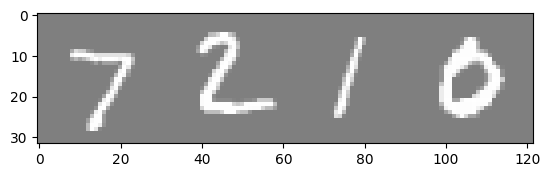

In [3]:
#Demo prediction on a single image from MNIST test set
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{predicted[j].item()}' for j in range(4)))
imshow(torchvision.utils.make_grid(images.cpu()[:4]))